# Convolutional Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def conv2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width   = image.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [3]:
def relu(x):
    return np.maximum(0, x)

In [4]:
def max_pooling(image, pool_size=2):
    image_height, image_width = image.shape

    output_height = (image_height + pool_size - 1) // pool_size
    output_width = (image_width + pool_size - 1) // pool_size
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * pool_size
            start_j = j * pool_size
            end_i = min(start_i + pool_size, image_height)
            end_j = min(start_j + pool_size, image_width)

            region = image[start_i:end_i, start_j:end_j]
            output[i, j] = np.max(region)

    return output

In [5]:
def avg_pooling(image, pool_size=2):
    image_height, image_width = image.shape

    output_height = (image_height + pool_size - 1) // pool_size
    output_width = (image_width + pool_size - 1) // pool_size
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * pool_size
            start_j = j * pool_size
            end_i = min(start_i + pool_size, image_height)
            end_j = min(start_j + pool_size, image_width)

            region = image[start_i:end_i, start_j:end_j]
            output[i, j] = np.average(region)

    return output

In [6]:
def dense_layer(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Working Example

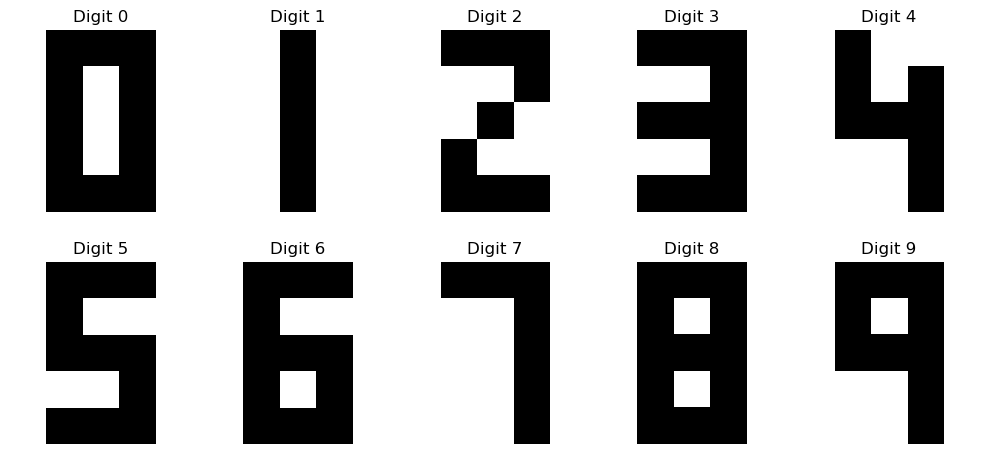

In [7]:
dataset = [
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ])
    
]

labels = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),  # Label for second image
    np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),  # Label for first image
]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(dataset[i], cmap='gray_r')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
kernel = np.random.randn(3, 3)
feature_map  = conv2d(img, kernel)
activated    = relu(feature_map)
pooled       = max_pooling(activated, pool_size=2)
flattened    = pooled.flatten()

In [14]:
kernel = np.random.randn(3, 3)
fc_weights = np.random.randn(len(flattened), 10)*0.01
fc_bias = np.random.randn(10)*0.01

epochs = 10
learning_rate = 0.1

for epoch in range(epochs):

    total_loss = 0

    for img, label in zip(dataset, labels):
        
        # Forward
        feature_map  = conv2d(img, kernel)
        activated    = relu(feature_map)
        pooled       = max_pooling(activated, pool_size=2)
        flattened    = pooled.flatten()
        dense_output = dense_layer(flattened, fc_weights, fc_bias)
        output_layer = softmax(dense_output)
        # Forward End

        loss_gradient = output_layer - label
        
        #fc_weights_gradient = np.outer(flattened, loss_gradient)
        fc_weights_gradient = np.dot(flattened[:, np.newaxis], loss_gradient[np.newaxis, :])
        fc_bias_gradient    = loss_gradient
        flattened_gradient  = np.dot(fc_weights, loss_gradient)

        # Reshape for pooling layer
        pooled_gradient = flattened_gradient.reshape(pooled.shape)
    
        # Backprop through max pooling
        feature_map_gradient = np.zeros_like(activated)
        for i in range(pooled.shape[0]):
            for j in range(pooled.shape[1]):
                max_val = pooled[i, j]
                for m in range(2):
                    for n in range(2):
                        orig_x, orig_y = i*2 + m, j*2 + n
                        if orig_x < activated.shape[0] and orig_y < activated.shape[1]:  # Check bounds
                            if activated[orig_x, orig_y] == max_val:
                                feature_map_gradient[orig_x, orig_y] = pooled_gradient[i, j]

    
        # Backprop through ReLU
        feature_map_gradient *= np.where(feature_map > 0, 1, 0)
    
        # Backprop through convolution
        kernel_gradient = np.zeros_like(kernel)
        
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                kernel_gradient[i, j] = np.sum(img[i:i+feature_map.shape[0], j:j+feature_map.shape[1]] * feature_map_gradient)
    
        # Update weights
        fc_weights -= learning_rate * fc_weights_gradient
        fc_bias -= learning_rate * fc_bias_gradient
        kernel -= learning_rate * kernel_gradient

        loss = -np.sum(label * np.log(output_layer + 1e-9))
        total_loss += loss
  
    avg_loss = total_loss / len(dataset)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
        
print("Updated Kernel:", kernel)

Epoch 1, Loss: 2.3686
Epoch 2, Loss: 2.3399
Epoch 3, Loss: 2.3138
Epoch 4, Loss: 2.2862
Epoch 5, Loss: 2.2534
Epoch 6, Loss: 2.2112
Epoch 7, Loss: 2.1584
Epoch 8, Loss: 2.0955
Epoch 9, Loss: 2.0248
Epoch 10, Loss: 1.9469
Updated Kernel: [[-1.38163429  1.15691799  0.85067741]
 [ 0.16578859 -1.26846557 -0.00234274]
 [-0.08340837 -0.03053193 -0.88981685]]
